<a href="https://colab.research.google.com/github/Charan-Repala/EDA/blob/main/eda0170.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

            date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02/05/14 0:00   313000.0         3       1.50         1340      7912   
1  02/05/14 0:00  2384000.0         5       2.50         3650      9050   
2  02/05/14 0:00   342000.0         3       2.00         1930     11947   
3  02/05/14 0:00   420000.0         3       2.25         2000      8030   
4  02/05/14 0:00   550000.0         4       2.50         1940     10500   

   floors waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5          0   0.0          3        1340              0      1955   
1     2.0          0   4.0          5        3370            280      1921   
2     1.0          0   0.0          4        1930              0      1966   
3     1.0          0   0.0          4        1000           1000      1963   
4     1.0          0   0.0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0      

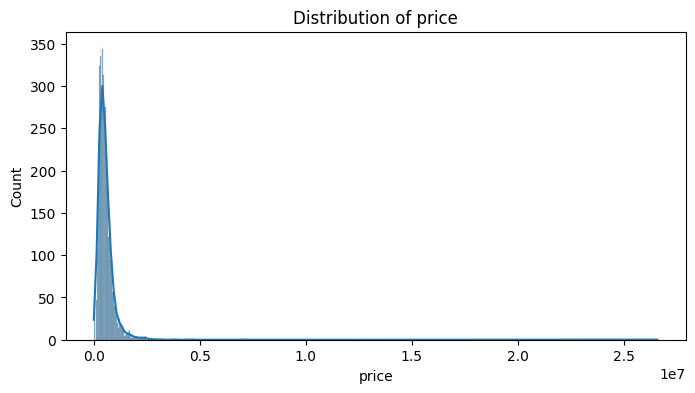

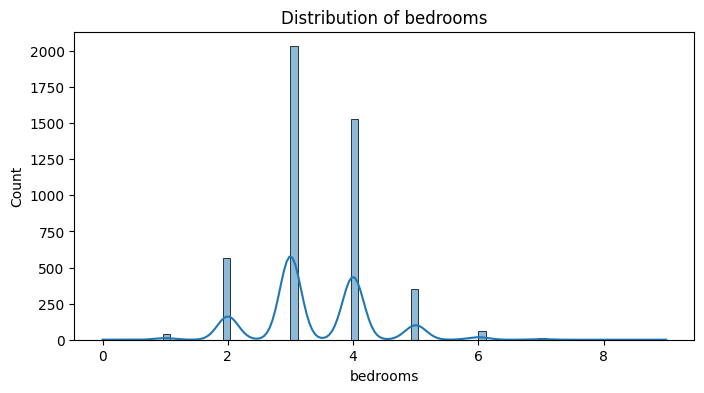

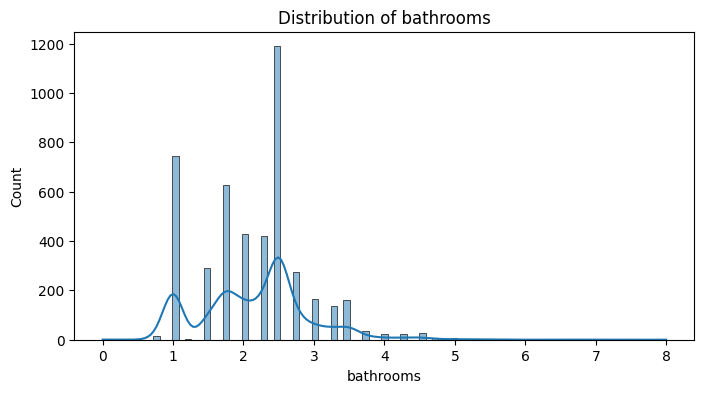

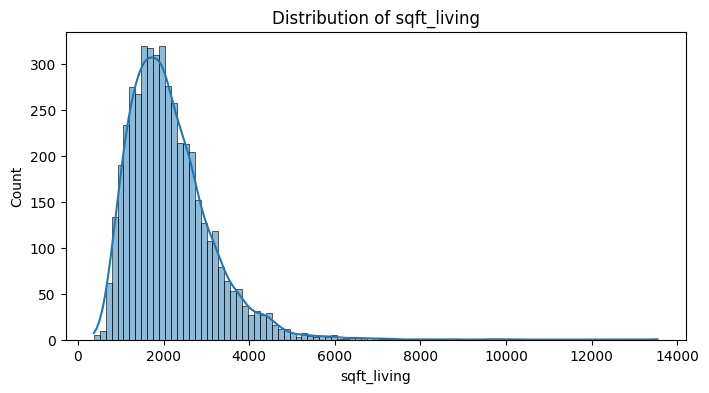

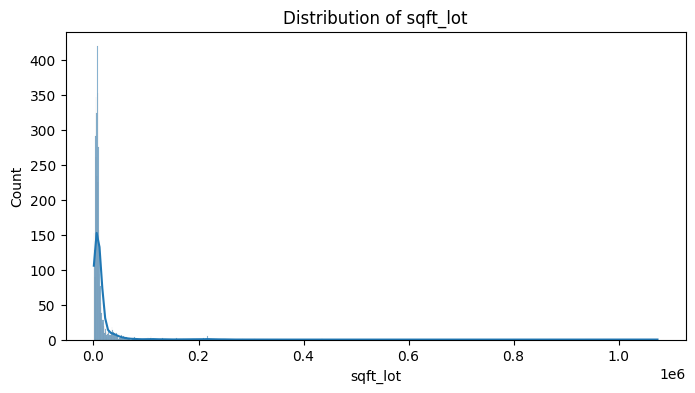

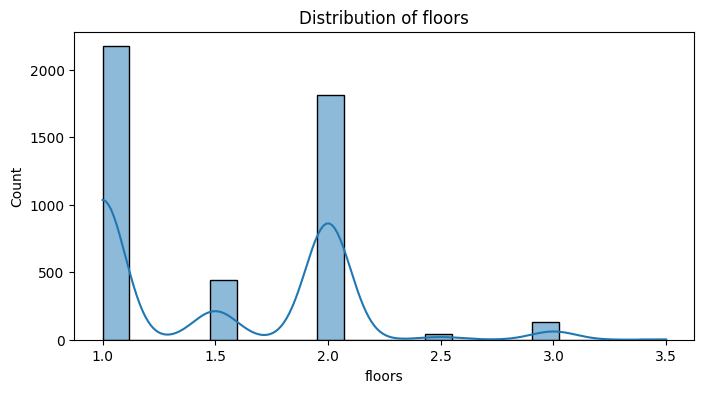

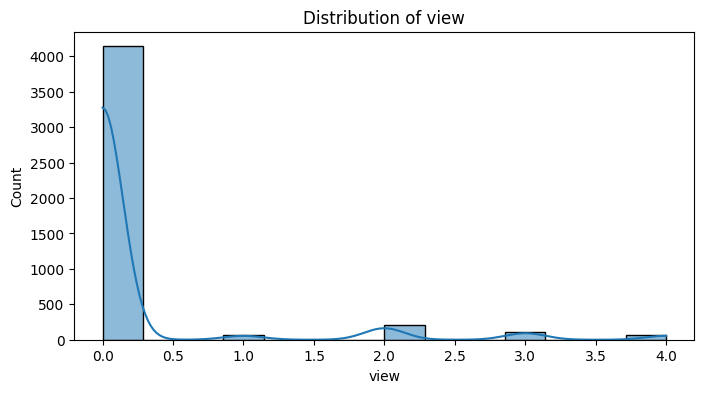

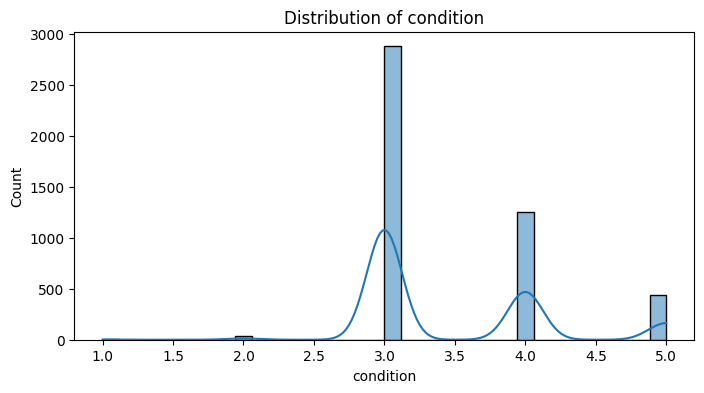

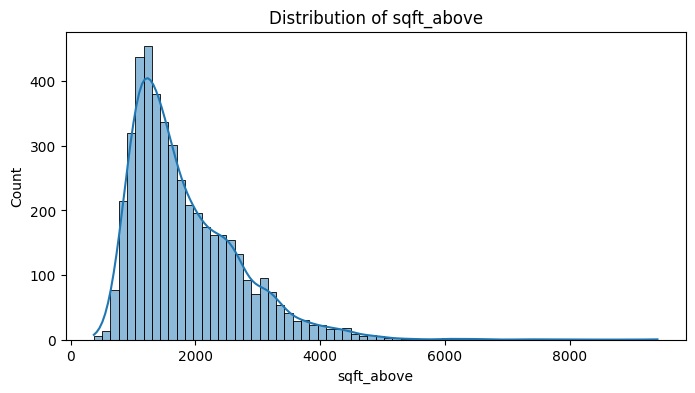

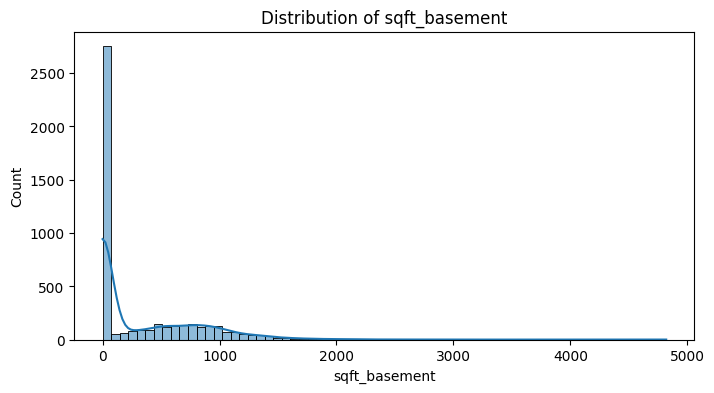

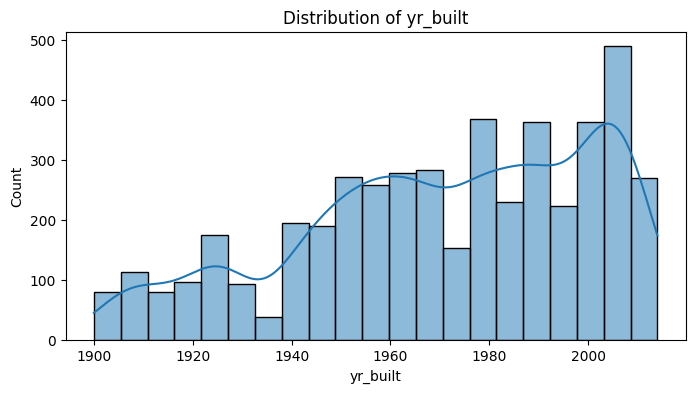

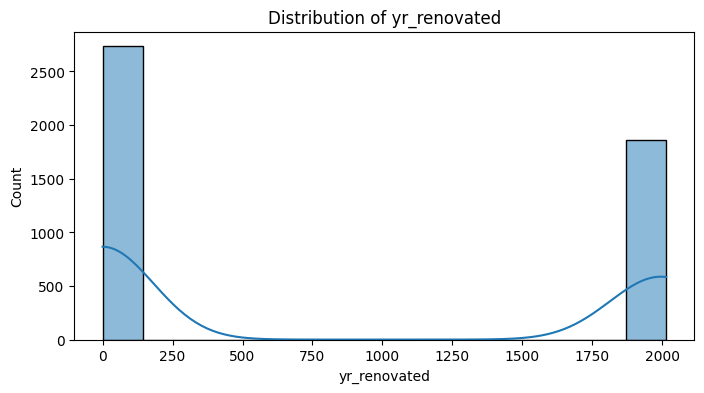

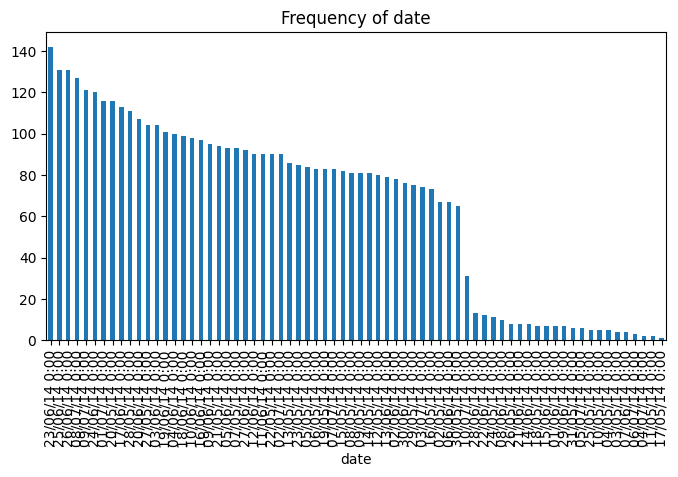

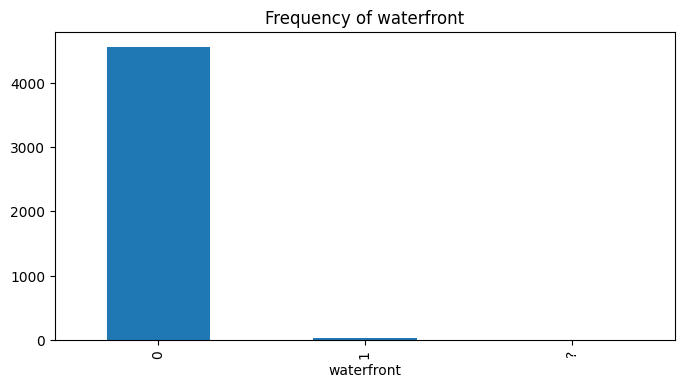

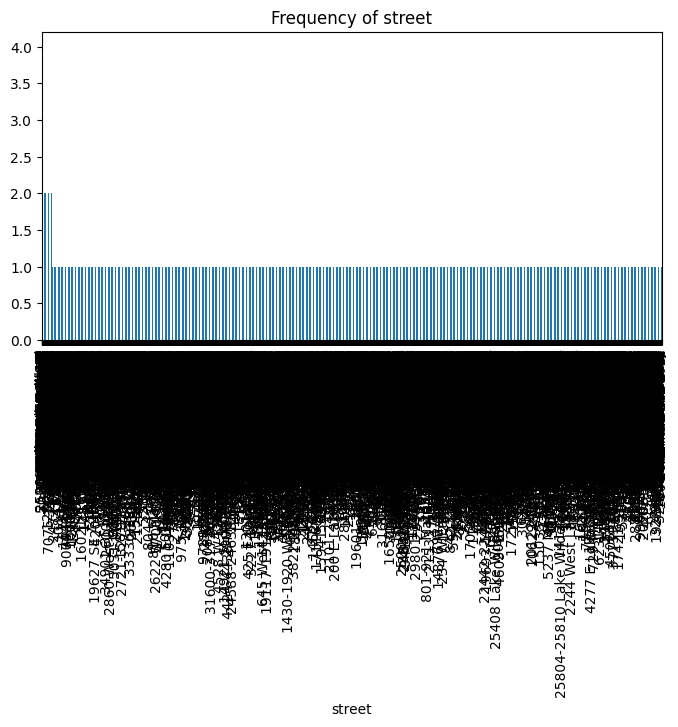

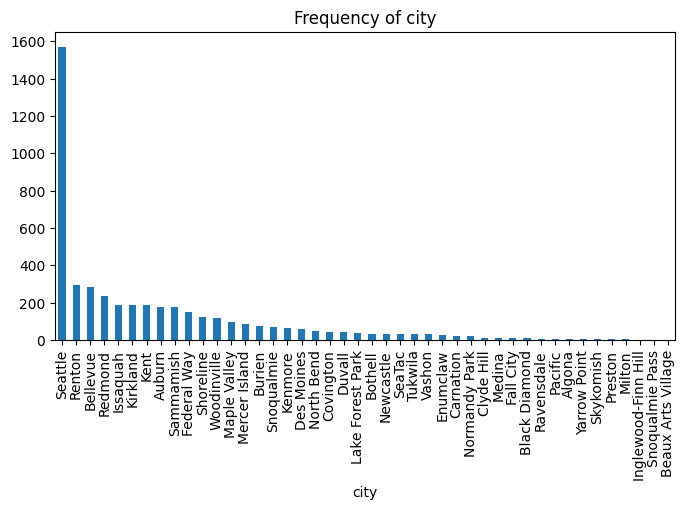

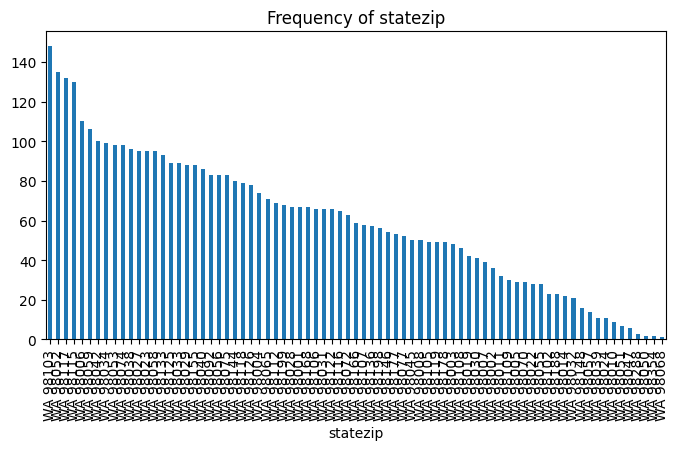

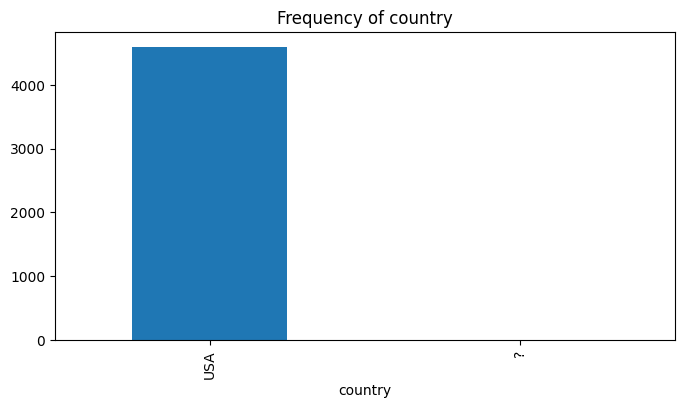

In [11]:
#21BDS0170 R. Eswar Sai Charan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/house%20price.csv"
data = pd.read_csv(url)

# Initial Data Check
print(data.head())
print(data.info())
print(data.describe())

# Data Types and Measurement Scales
numerical_data = data.select_dtypes(include=['int64', 'float64'])
categorical_data = data.select_dtypes(include=['object'])

# Visualizations: Histograms for Numerical Data
for col in numerical_data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Bar plot for Categorical Data
for col in categorical_data.columns:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f"Frequency of {col}")
    plt.show()


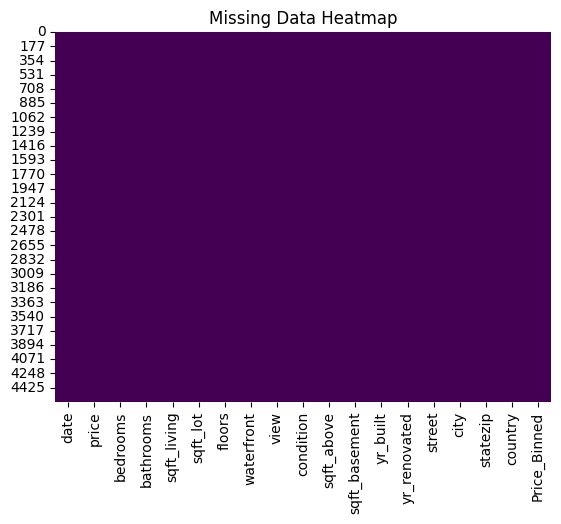

In [12]:
# Data Deduplication
data = data.drop_duplicates()

# Handling Missing Data
# Fill numeric columns with the mean and non-numeric with the mode
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = data.select_dtypes(exclude=['float64', 'int64']).columns

data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())
data[non_numeric_cols] = data[non_numeric_cols].fillna(data[non_numeric_cols].mode().iloc[0])

# Discretization and Binning
# Ensure 'price' column exists in the data and is numeric before binning
if 'price' in data.columns and pd.api.types.is_numeric_dtype(data['price']):
    data['Price_Binned'] = pd.cut(data['price'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
else:
    print("Column 'price' not found or is non-numeric.")

# Visualize Missing Data (if any)
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


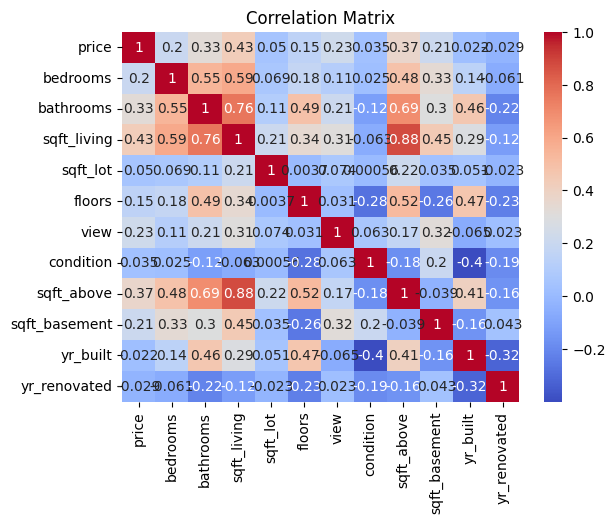

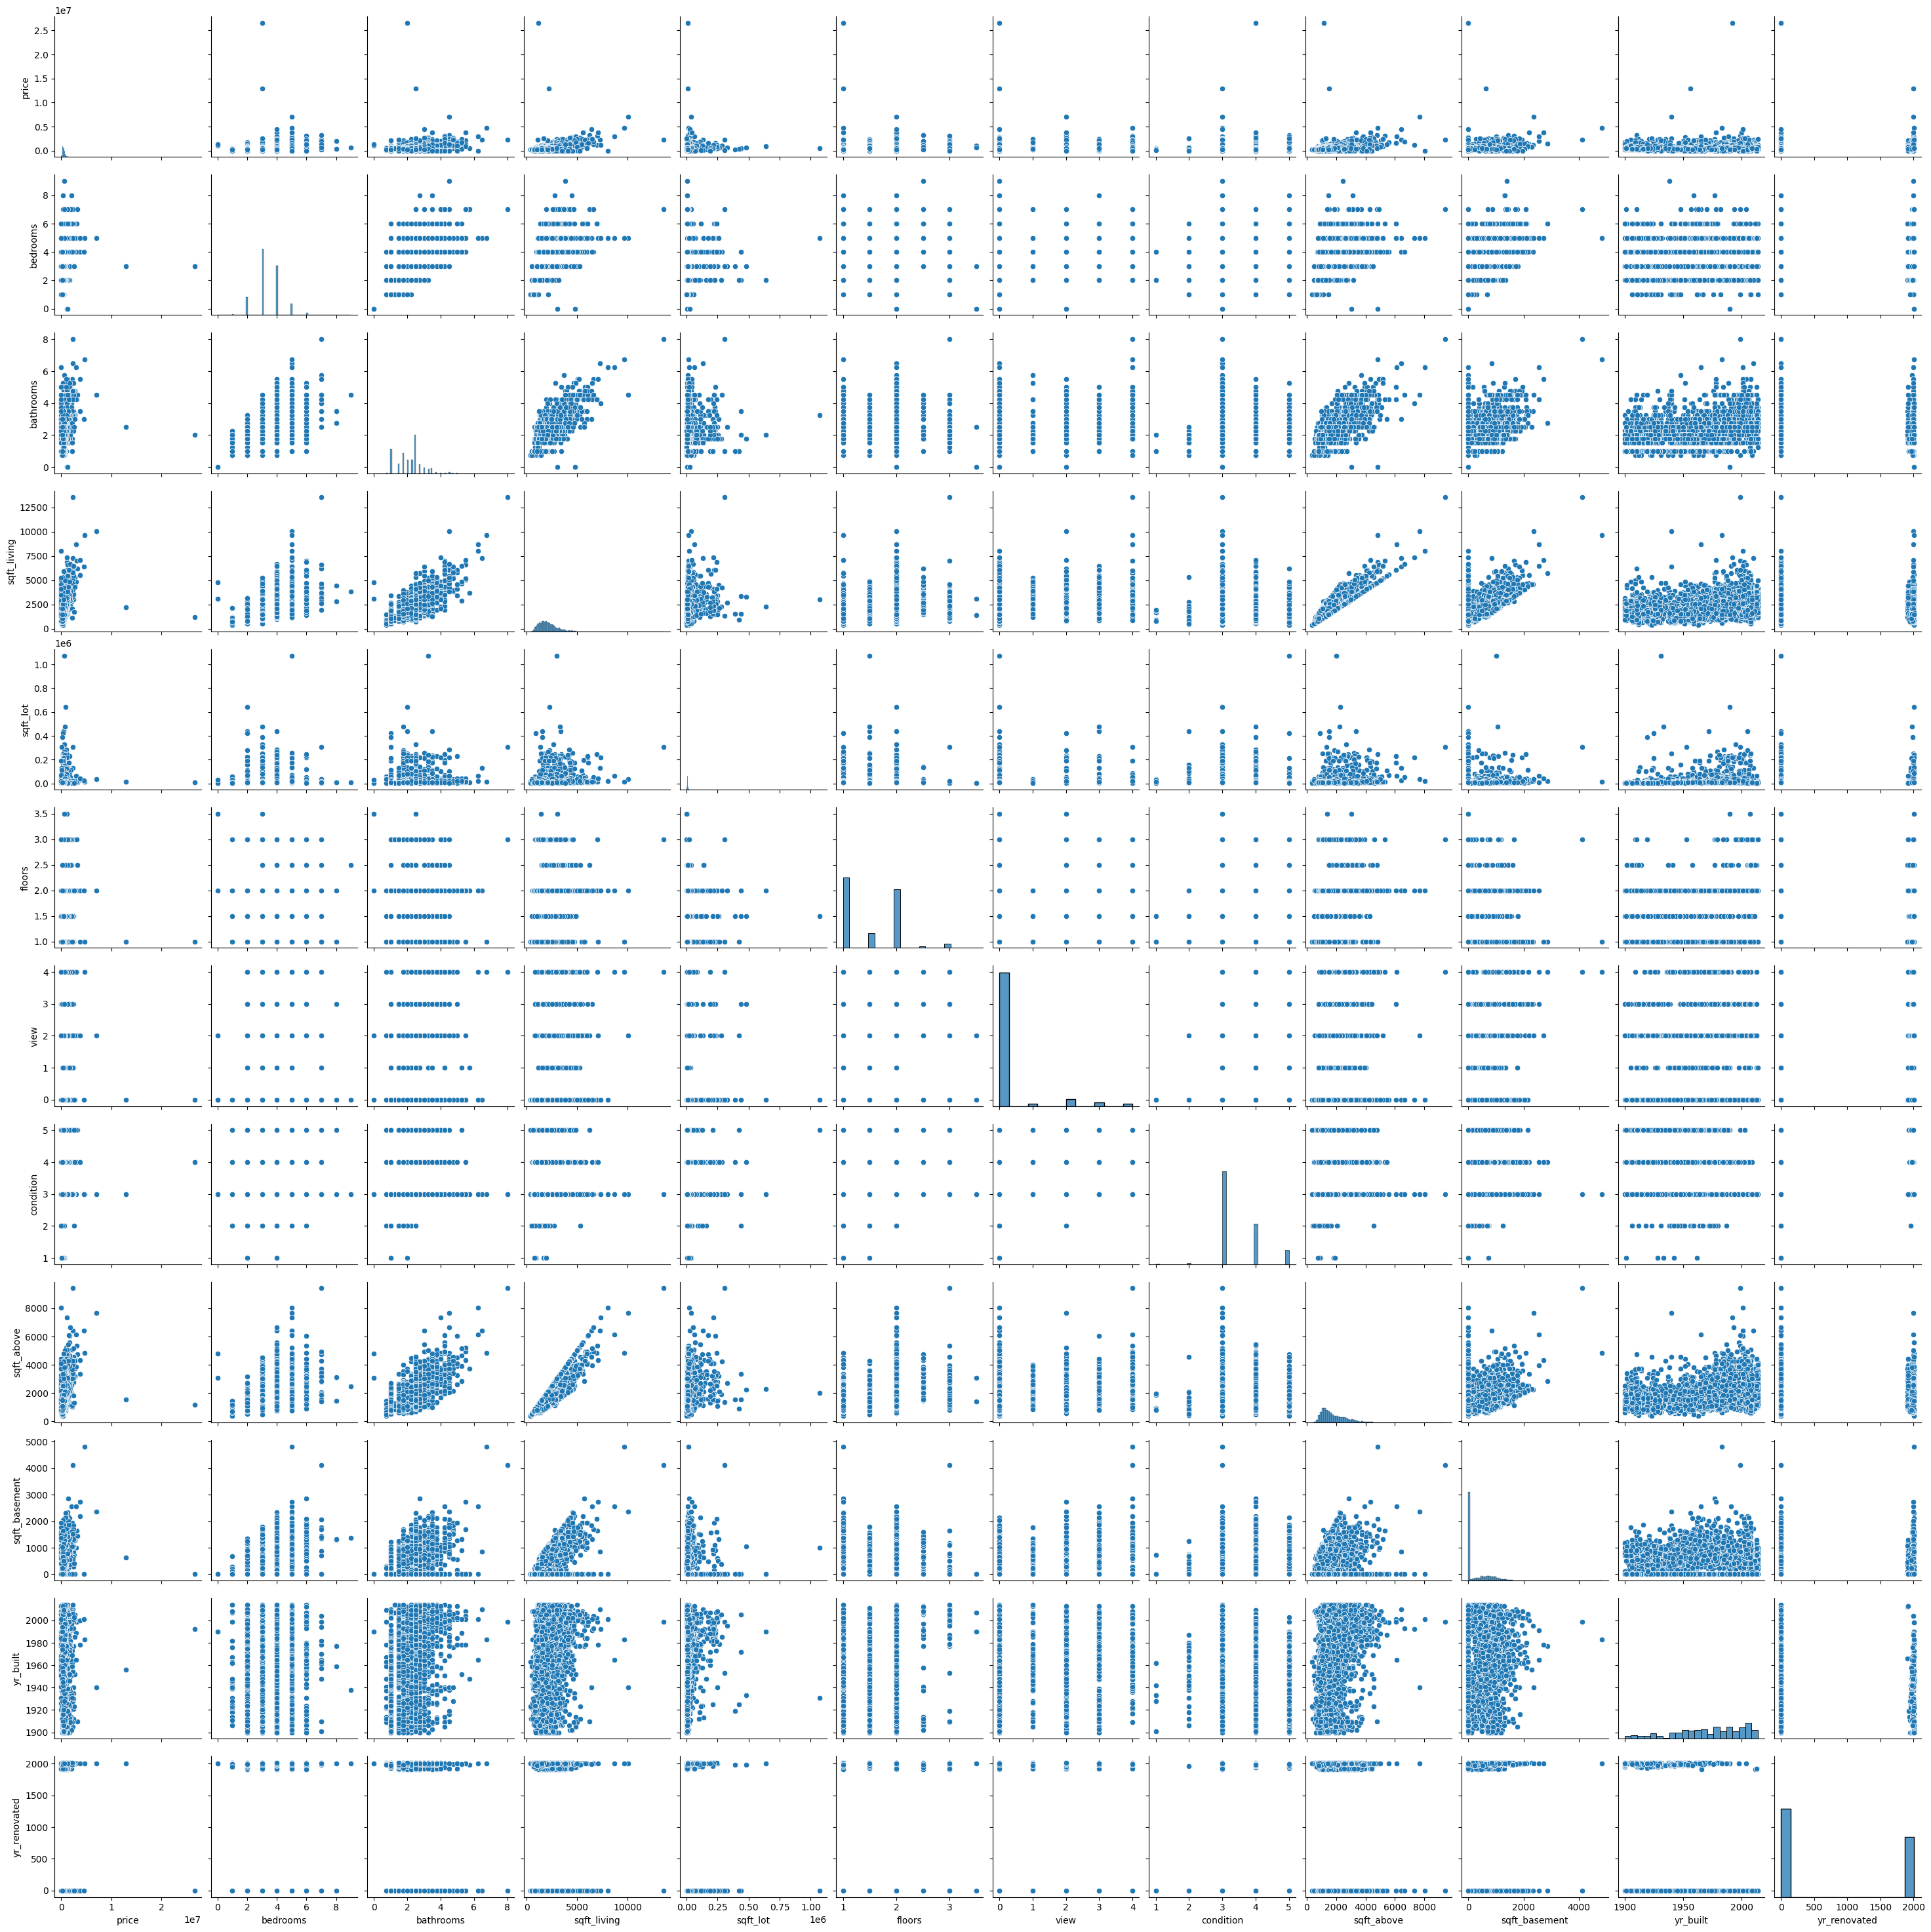

In [13]:
from scipy.stats import pearsonr

# Correlation Matrix for Numerical Features
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Scatter Plot for Bivariate Analysis
sns.pairplot(numerical_data)
plt.show()


              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors         view    condition   sqft_above  sqft_basement  \
count  4600.000000  4600.000000  4600.000000  4600.000000    4600.000000   
mean      1.512065     0.240705     3.451739  1827.265435     312.081522   
std       0.538288     0.778397     0.677230   862.168977     464.137228   
mi

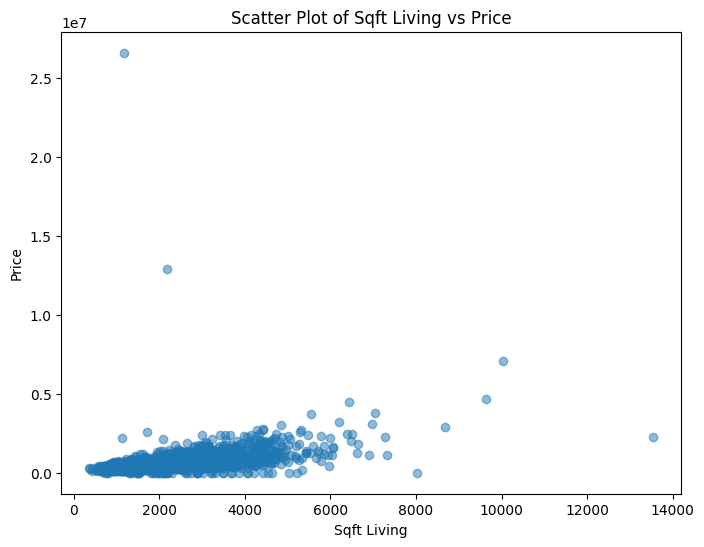

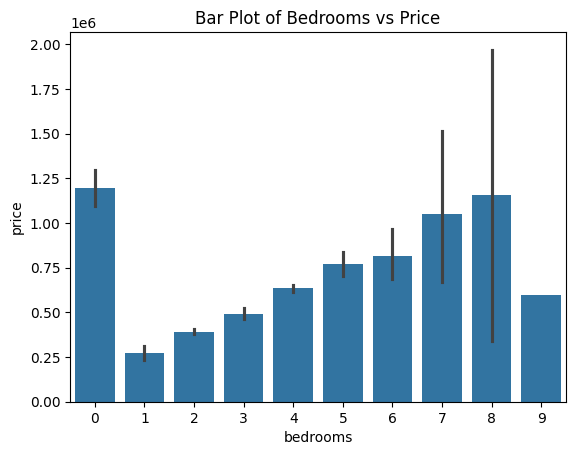

In [14]:
# Summary Statistics
print(data.describe())

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(data['sqft_living'], data['price'], alpha=0.5)
plt.title("Scatter Plot of Sqft Living vs Price")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.show()

# Bar Plot
sns.barplot(x='bedrooms', y='price', data=data)
plt.title("Bar Plot of Bedrooms vs Price")
plt.show()


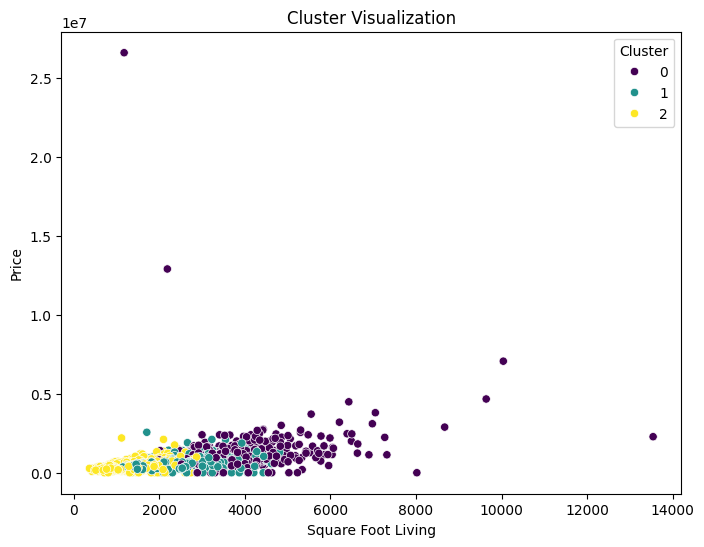

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Check and handle any remaining NaN values before scaling
# Option 1: Drop rows with any NaN values (useful if a small percentage of rows are affected)
data = data.dropna()

# OR Option 2: Fill remaining NaNs (if dropping rows would remove too much data)
# numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
# data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Scaling Data
scaler = StandardScaler()
numerical_data = data.select_dtypes(include=['int64', 'float64'])
data_scaled = scaler.fit_transform(numerical_data)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['sqft_living'], y=data['price'], hue=data['Cluster'], palette="viridis")
plt.title("Cluster Visualization")
plt.xlabel("Square Foot Living")
plt.ylabel("Price")
plt.show()


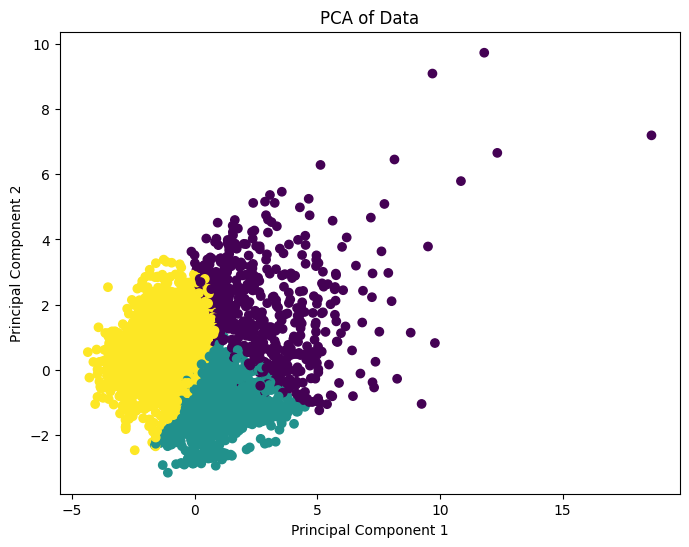

In [16]:
from sklearn.decomposition import PCA

# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Visualize PCA
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PCA of Data")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 993599.3046325457


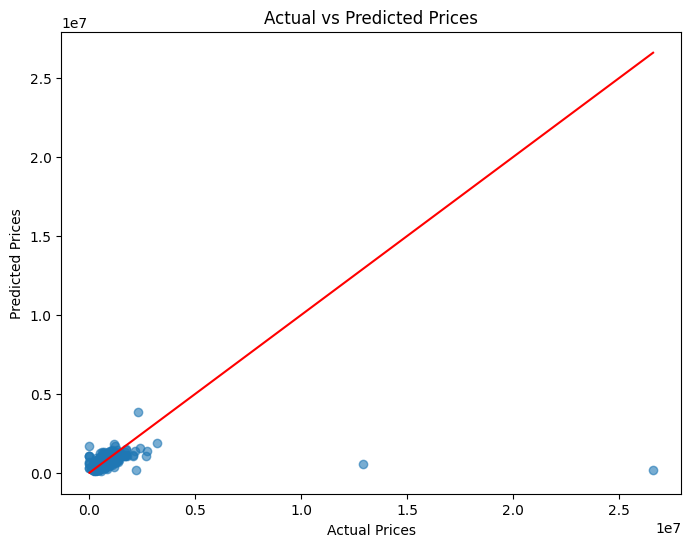

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split Data
X = numerical_data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Visualization of Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()
